# Reading .csv files using pandas

Finding and reading station meteorology data   
https://www.ncdc.noaa.gov/cdo-web/datasets   
I already downloaded the data for Providence (daily_providence.csv), and you can find this on Canvas/Files/data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#filename='/Users/jungeunl/class/data/daily_providence.csv' #using Python on my laptop
filename='daily_providence.csv'

# Read a file and choose DATE as an index
f = pd.read_csv(filename,index_col=2)
#header becomes the variable name, e.g., f.PRCP
print(f.head(5)) # Read the first 5 lines of the data

                STATION               NAME  ACMH  ACSH  AWND  FMTM  PGTM  \
DATE                                                                       
1942-08-01  USW00014765  PROVIDENCE, RI US   NaN   NaN   NaN   NaN   NaN   
1942-08-02  USW00014765  PROVIDENCE, RI US   NaN   NaN   NaN   NaN   NaN   
1942-08-03  USW00014765  PROVIDENCE, RI US   NaN   NaN   NaN   NaN   NaN   
1942-08-04  USW00014765  PROVIDENCE, RI US   NaN   NaN   NaN   NaN   NaN   
1942-08-05  USW00014765  PROVIDENCE, RI US   NaN   NaN   NaN   NaN   NaN   

            PRCP  PSUN  SNOW  ...  TMIN  TSUN  WDF1  WDF2  WDF5  WDFG  WSF1  \
DATE                          ...                                             
1942-08-01   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1942-08-02   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1942-08-03   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1942-08-04   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

In [4]:
#print(f.shape)   # data shpe
#print(f.dtypes)  # data type
print(f.index)   # index
#print(f.describe())  # basic statistics

Index(['1942-08-01', '1942-08-02', '1942-08-03', '1942-08-04', '1942-08-05',
       '1942-08-06', '1942-08-07', '1942-08-08', '1942-08-09', '1942-08-10',
       ...
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25', '2019-02-26',
       '2019-02-27', '2019-02-28', '2019-03-01', '2019-03-02', '2019-03-03'],
      dtype='object', name='DATE', length=26149)


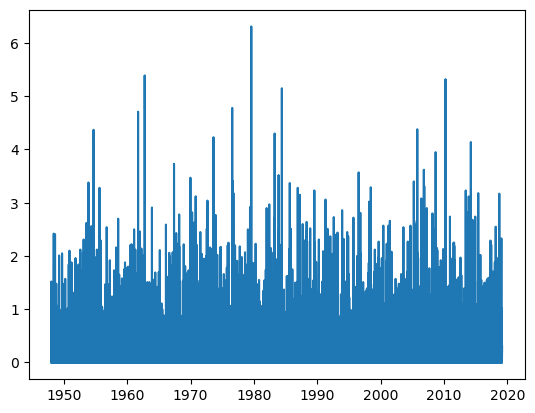

In [5]:
#print f.index
# Example of using time as an index
#print f["2015-03-01":"2015-05-31"]

# Converts to DatetimeArray/Index to write an axis label
# Make index as a standard time unit
f.index=pd.to_datetime(f.index)

# Plot precipitation
plt.plot(f.index,f["PRCP"])

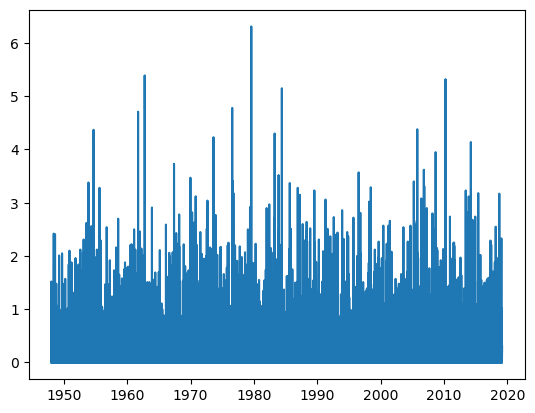

In [6]:
# Another way
plt.plot(f.index,f.PRCP)

In [7]:
# Choose only some specific variables (TAVG, TMAX, TMIN, PRCP) and save them as a.
a=f[['PRCP','TMAX','TMIN','TAVG']]

# calculate multi-monthly average
monb=a.groupby(a.index.month).mean()           

# calculate standard deviation
stdb=a.groupby(a.index.month).std()

print (monb.TAVG)
#print (stdb)

DATE
1     29.034653
2     32.191257
3     37.981081
4     48.873810
5     59.055684
6     67.978571
7     73.956221
8     72.953917
9     66.204762
10    54.497696
11    44.719048
12    35.534562
Name: TAVG, dtype: float64


Text(0.5, 1.0, 'Providence monthly average temperature')

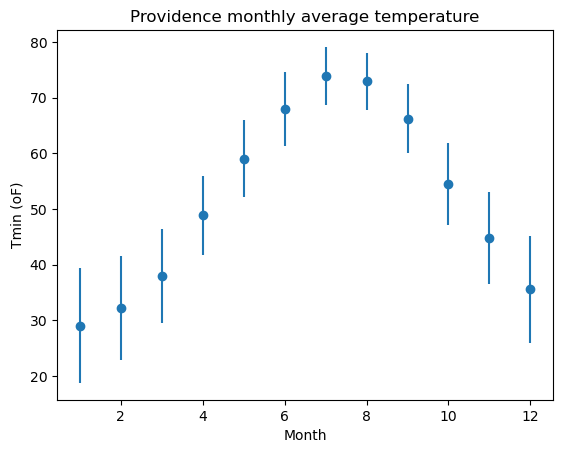

In [13]:
#plt.errorbar(x, y, yerr=yerr, xerr=xerr,fmt='')
plt.errorbar(monb.index,monb.TAVG,yerr=stdb.TAVG,fmt='o')
plt.xlabel('Month')
plt.ylabel('Tmin (F)')
plt.title('Providence monthly average temperature')

In [9]:
# Calculate avarages before year 2000.
b2000=a[:"2000"] 

# calculate multi-monthly average
monb2000=b2000.groupby(b2000.index.month).mean()           

# calculate standard deviation
stdb2000=b2000.groupby(b2000.index.month).std()

In [10]:
# Calculate avarages after year 2000.
a2000=a["2001":]  # after 2001

# calculate multi-monthly average
mona2000=a2000.groupby(a2000.index.month).mean()           

# calculate standard deviation
stda2000=a2000.groupby(a2000.index.month).std()

Text(0.5, 1.0, 'Providence monthly average temperature')

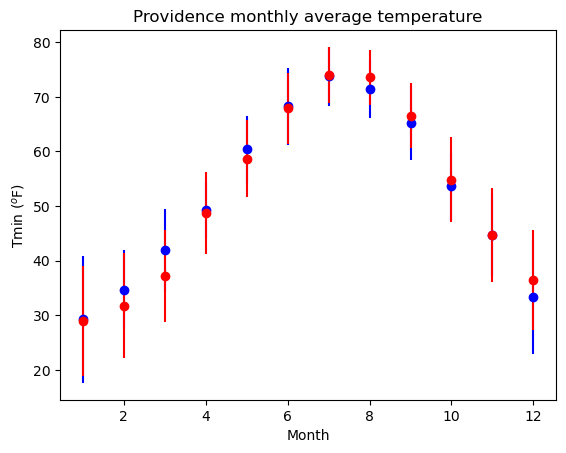

In [11]:
# Plot before and after 2000 for average temperature (TAVG)
plt.errorbar(monb2000.index,monb2000.TAVG,yerr=stdb2000.TAVG,fmt='o', color='b')
plt.errorbar(mona2000.index,mona2000.TAVG,yerr=stda2000.TAVG,fmt='o', color='r')
plt.xlabel('Month')
plt.ylabel('Tmin ($^o$F)')
plt.title('Providence monthly average temperature')

### Exercise
Plot before and after 2000 for minimum temperature (TMIN).

### Exercise
Plot before and after 2000 for maximum temperature (TMAX).

### Exercise
Calculate monthly average precipitation.

### Exercise
Plot before and after 2000 for precipitation (PRCP).

### Exercise
You can find the similar data for Chicago (daily_chicago.csv). Please read the data using Pandas (make time as an index; index_col=2) and print the first 5 lines.

### Exercise
Make index as a standard time unit

### Exercise
Plot precipitation.

### Exercise
Calculate monthly average. We could choose only some specific variables (PRCP, TAVG) and save them as d.

### Exercise
Calculate monthly average values and standard deviation.

### Exercise
Plot average temperature for Chicago and Providence.

### Exercise
Plot average precipitation for Chicago and Providence.

### Exercise (Extra +1)
Choose another city, download the file from the NOAA site, and plot monthly average temperature (Choose dataset called Daily Summaries).

### Exercise (Extra +1)
Plot monthly average precipitation.